# Pipeline
---
1. **Data Acquisition.**
2. **Preprocessing.**
3. **Text Representation.**
4. **ML Model.**
5. **Evaluation.**

## **Import Needed libraries**

In [11]:
# !pip install nltk

In [12]:
import nltk

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## **Data Acquistion**

In [14]:
df = pd.read_csv("Emotion_classify_Data.csv")

In [15]:
df.head() 

Comment Emotion
0  i seriously hate one subject to death but now ...    fear
1                 im so full of life i feel appalled   anger
2  i sit here to write i start to dig out my feel...    fear
3  ive been really angry with r and i feel like a...     joy
4  i feel suspicious if there is no one outside l...    fear

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5937 entries, 0 to 5936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Comment  5937 non-null   object
 1   Emotion  5937 non-null   object
dtypes: object(2)
memory usage: 92.9+ KB


### Checking Class Balance

In [17]:
df['Emotion'].value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

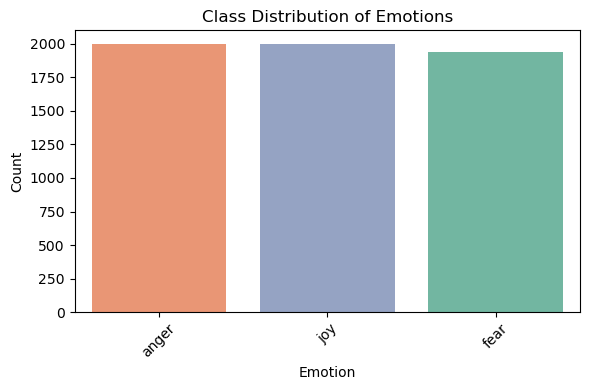

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=df,
    x='Emotion',
    hue='Emotion',
    order=df['Emotion'].value_counts().index,
    palette="Set2"
)
plt.title("Class Distribution of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **Preprocessing**

In [19]:
# Use this utility function to get the preprocessed text data
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    
    tokens = word_tokenize(text.lower())  # Tokenization & Lowercasing
    filtered_tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
    
    return ' '.join(filtered_tokens)

In [20]:
df['preprocessed_comment'] = df['Comment'].apply(preprocess_text)

In [21]:
df.head()

Comment Emotion  \
0  i seriously hate one subject to death but now ...    fear   
1                 im so full of life i feel appalled   anger   
2  i sit here to write i start to dig out my feel...    fear   
3  ive been really angry with r and i feel like a...     joy   
4  i feel suspicious if there is no one outside l...    fear   

                                preprocessed_comment  
0  seriously hate one subject death feel reluctan...  
1                         im full life feel appalled  
2  sit write start dig feeling think afraid accep...  
3  ive really angry r feel like idiot trusting fi...  
4  feel suspicious one outside like rapture happe...

In [22]:
encoder = LabelEncoder()
# encoder.fit(df['Emotion'])
# df['emotion_num'] = encoder.transform(df['Emotion'])

df['emotion_num'] = encoder.fit_transform(df['Emotion'])

In [23]:
df.head()

Comment Emotion  \
0  i seriously hate one subject to death but now ...    fear   
1                 im so full of life i feel appalled   anger   
2  i sit here to write i start to dig out my feel...    fear   
3  ive been really angry with r and i feel like a...     joy   
4  i feel suspicious if there is no one outside l...    fear   

                                preprocessed_comment  emotion_num  
0  seriously hate one subject death feel reluctan...            1  
1                         im full life feel appalled            0  
2  sit write start dig feeling think afraid accep...            1  
3  ive really angry r feel like idiot trusting fi...            2  
4  feel suspicious one outside like rapture happe...            1

In [24]:
X = df['preprocessed_comment']
y = df['emotion_num']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## **Text Representation**

In [26]:
v = TfidfVectorizer()

X_train_cv = v.fit_transform(X_train)
X_test_cv = v.transform(X_test)

In [32]:
pd.Series(v.get_feature_names_out())

0               aa
1              aac
2            aaron
3          abandon
4        abandoned
           ...    
7036        zombie
7037          zone
7038    zonisamide
7039            zq
7040         zumba
Length: 7041, dtype: object

In [28]:
df = pd.DataFrame(X_train_cv.toarray())
df

0     1     2     3     4     5     6     7     8     9     ...  7031  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4744   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4745   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4746   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4747   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4748   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      7032  7033  7034  7035  7036  7037  7038  7039  7040  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
4744   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4745   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4746   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4747   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4748   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[4749 rows x 7041 columns]

## **ML Modeling and Evaluation**

In [29]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Naive Bayes": MultinomialNB()
}


=== Logistic Regression ===
Accuracy: 92.17 %


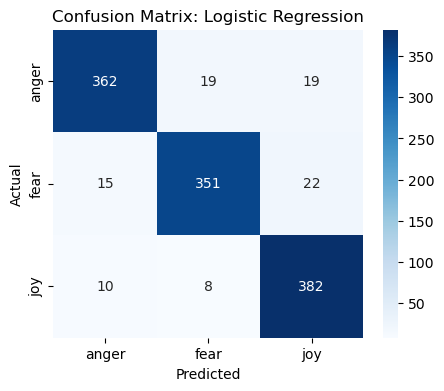

Classification Report:
               precision    recall  f1-score   support

       anger       0.94      0.91      0.92       400
        fear       0.93      0.90      0.92       388
         joy       0.90      0.95      0.93       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188


=== Random Forest ===
Accuracy: 93.69 %


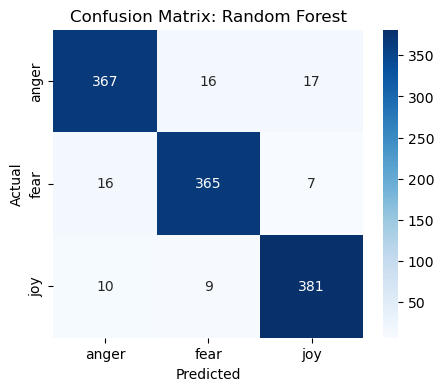

Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.92      0.93       400
        fear       0.94      0.94      0.94       388
         joy       0.94      0.95      0.95       400

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188


=== SVM ===
Accuracy: 92.17 %


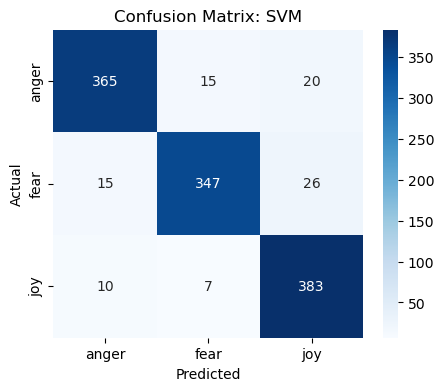

Classification Report:
               precision    recall  f1-score   support

       anger       0.94      0.91      0.92       400
        fear       0.94      0.89      0.92       388
         joy       0.89      0.96      0.92       400

    accuracy                           0.92      1188
   macro avg       0.92      0.92      0.92      1188
weighted avg       0.92      0.92      0.92      1188


=== Naive Bayes ===
Accuracy: 89.31 %


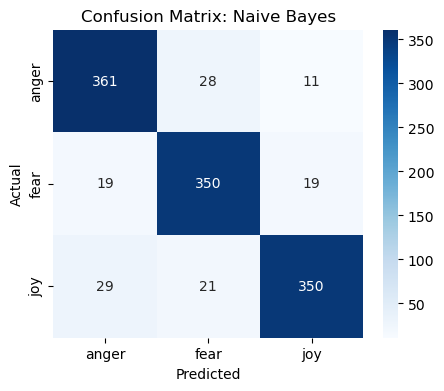

Classification Report:
               precision    recall  f1-score   support

       anger       0.88      0.90      0.89       400
        fear       0.88      0.90      0.89       388
         joy       0.92      0.88      0.90       400

    accuracy                           0.89      1188
   macro avg       0.89      0.89      0.89      1188
weighted avg       0.89      0.89      0.89      1188



In [30]:
results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_cv, y_train)
    y_pred = model.predict(X_test_cv)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc * 100:.2f} %")

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=encoder.classes_, yticklabels=encoder.classes_, cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_))       
    
    results[name] = float(f"{acc * 100:.2f}")

In [31]:
print("\n---- Model Comparison ----")
for model_name, acc in results.items():
    print(f"{model_name}: {acc} %")

best_model = max(results, key=results.get)
print(f"\nBest Performing Model: {best_model}")


---- Model Comparison ----
Logistic Regression: 92.17 %
Random Forest: 93.69 %
SVM: 92.17 %
Naive Bayes: 89.31 %

Best Performing Model: Random Forest
